# Overview
The below code loops through all of the socioeconomic datasets from 2010-2016

Current data transformations:
* Removed the first row of each file, the first is a repeat of the column headers (also may replace column headers if we want).
* Removed Country and State Level data, which are indicated by their 5-digit FIPS code being % 1000 == 0

Still Need To:
* Decide exactly which columns we want to use
* Make sure for these columns that we parse them as the correct dtype

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import os

## Loading Socioeconomic Data

In [2]:
all_socio_df = []


for i in range(0,7):
    '''
    If we want to get specific columns of the dataframe, we can use the usecols list. Note that we cannot specify
    the dtype here as the second row of the dataframe (which has string values) interferes with it. We could solve
    this by removing the second row of the csv or specifying dtypes later:
    
    current_df = pd.read_csv('../data/county_level/countyhealthranking/analytic_data201' + str(i) + '.csv',
                             usecols = ['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Name'])    
    
    '''
    current_df = pd.read_csv('../../data/county_level/countyhealthranking/analytic_data201' + str(i) + '.csv')
    
    
    '''
    I am not sure which row we want to use for the headings of the dataframe. The two options right now are
    the first and second rows of the csvs. The current code uses the first row as the names. If we want to use
    the second row instead, comment out the line below this comment and replace it with:
    
    # The below code essentially makes the second row in the csv the header for the dataframe
    new_header = current_df.iloc[0] #grab the first row for the header
    current_df = current_df[1:] #take the data less the header row
    current_df.columns = new_header #set the header row as the df header    
    '''
    current_df = current_df.drop(0)
    
    '''
    We also want to filter out the data that belongs to the US and each individual state. We can do this by looking
    at the 5-digit FIPS code (fipscode), where if fipscode % 1000 == 0, then the row belongs to a state. We also 
    want this row to be of type int32. We will have to deal with typing later for other columns as well.
    
    We will need to change the hardcoded '5-digit FIPS Code' and 'Release Year' if we change the column headers
    '''
    current_df['5-digit FIPS Code'] = current_df['5-digit FIPS Code'].astype(str)
    current_df['Release Year'] = current_df['Release Year'].astype(str).astype(int)
    current_df = current_df[current_df['5-digit FIPS Code'].astype(int) % 1000 != 0]
    
    all_socio_df.append(current_df)
    
# ignore_index = True just reindexes the rows for the new dataframe
socio_df = pd.concat(all_socio_df, ignore_index=True)

/homes/iws/bhimar/cse481ds-mental-health/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,24

/homes/iws/bhimar/cse481ds-mental-health/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,24

## Loading Mental Health Data

In [3]:
mental_health_df = pd.read_csv('../../data/county_level/Compressed Mortality, 1999-2016.txt', sep='\t',
                               usecols = ['County Code', 'Year', 'Deaths', 'Population', 'Crude Rate'])

# There is text at the bottom of the file that we do not want to include
mental_health_df = mental_health_df[mental_health_df['County Code'].notnull()]

# The numbers are parsed as floats but we want them to be ints
for column_name in mental_health_df.columns:
    if column_name == 'County Code':
        mental_health_df[column_name] = mental_health_df[column_name].astype(int).astype(str)
    elif column_name == 'Crude Rate':
        mental_health_df[column_name] = mental_health_df[column_name].str.replace("\(Unreliable\)","").astype(float)
    else:
        mental_health_df[column_name] = mental_health_df[column_name].astype(int)
        
        
def make_5_digits(num):
    if len(num) == 4:
        num = "0" + num
    return num

mental_health_df["County Code"] = mental_health_df["County Code"].apply(make_5_digits)
    
mental_health_df

/homes/iws/bhimar/cse481ds-mental-health/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,County Code,Year,Deaths,Population,Crude Rate
0,01001,2001,11,44889,24.5
1,01001,2010,12,54571,22.0
2,01001,2011,12,55255,21.7
3,01001,2012,12,55027,21.8
4,01001,2013,11,54792,20.1
...,...,...,...,...,...
14310,56037,2010,11,43806,25.1
14311,56037,2011,15,44028,34.1
14312,56037,2012,13,45086,28.8
14313,56037,2013,13,45144,28.8


## Loading Environmental Data

In [4]:
fips_data_path = "../../data/county_level/county_fips.csv"
fips_df = pd.read_csv(fips_data_path)

fips_df["FIPS"] = fips_df["FIPS"].apply(str)

def get_last_three(num):
    return num[-3:]

fips_df["County FIPS"] = fips_df["FIPS"].apply(get_last_three)
fips_df["FIPS"] = fips_df["FIPS"].apply(make_5_digits)

# All of the original 50 U.S. states have FIPS codes less than 57000
fips_df = fips_df[fips_df["FIPS"].astype(int) < 57000]
fips_df

,FIPS,Name,State,County FIPS
0,01001,Autauga,AL,001
1,01003,Baldwin,AL,003
2,01005,Barbour,AL,005
3,01007,Bibb,AL,007
4,01009,Blount,AL,009
...,...,...,...,...
3137,56037,Sweetwater,WY,037
3138,56039,Teton,WY,039
3139,56041,Uinta,WY,041
3140,56043,Washakie,WY,043


### Temparature

There are 15 Counties with no temperature data

In [5]:
base_temp_path = "../../data/county_level/county_climate_temp/"

temp_df = pd.DataFrame(columns = ["County Code", "Year", "Average Temperature"])

no_temp_data_count = 0

for index, county_info_row in fips_df.iterrows():
    curr_file_path = base_temp_path + county_info_row["State"] + "-" + county_info_row["County FIPS"] + "-tavg-all-12-2010-2016.csv"
    
    file_size = os.path.getsize(curr_file_path)
    
    if file_size > 0:
        curr_data_df = pd.read_csv(curr_file_path, skiprows=(3))
        
        if curr_data_df.shape[0] == 84:
            curr_sum = 0
            month_count = 0

            for inner_index, temparature_row in curr_data_df.iterrows():
                curr_year = int(temparature_row['Date'].astype(str)[:4])

                curr_sum += temparature_row['Value'].astype(int)
                month_count += 1

                if (month_count == 12):
                    temp_df = temp_df.append({'County Code': county_info_row["FIPS"],
                                              'Year': curr_year,
                                              'Average Temperature': curr_sum/12}, ignore_index=True)

                    month_count = 0
                    curr_sum = 0
        else:
            no_temp_data_count += 1
    else:
        no_temp_data_count += 1
    
print("There are " + str(no_temp_data_count) + " counties that have no Temperature data")
temp_df

There are 15 counties that have no Temperature data


,County Code,Year,Average Temperature
0,01001,2010,63.000000
1,01001,2011,64.166667
2,01001,2012,65.250000
3,01001,2013,63.083333
4,01001,2014,62.500000
...,...,...,...
21884,56045,2012,48.083333
21885,56045,2013,43.750000
21886,56045,2014,43.500000
21887,56045,2015,46.250000


### Precipitation

In [6]:
base_precip_path = "../../data/county_level/county_climate_precip/"

precip_df = pd.DataFrame(columns = ["County Code", "Year", "Average Precipitation"])

no_precip_data_count = 0

for index, county_info_row in fips_df.iterrows():
    curr_file_path = base_precip_path + county_info_row["State"] + "-" + county_info_row["County FIPS"] + "-pcp-all-12-2010-2016.csv"
    
    file_size = os.path.getsize(curr_file_path)
    
    if file_size > 0:
        curr_data_df = pd.read_csv(curr_file_path, skiprows=(3))
        
        if curr_data_df.shape[0] == 84:
            curr_sum = 0
            month_count = 0

            for inner_index, precipitation_row in curr_data_df.iterrows():
                curr_year = int(precipitation_row['Date'].astype(str)[:4])

                curr_sum += precipitation_row['Value'].astype(int)
                month_count += 1

                if (month_count == 12):
                    precip_df = precip_df.append({'County Code': county_info_row["FIPS"],
                                              'Year': curr_year,
                                              'Average Precipitation': curr_sum/12}, ignore_index=True)

                    month_count = 0
                    curr_sum = 0
        else:
            no_precip_data_count += 1
    else:
        no_precip_data_count += 1
    
print("There are " + str(no_precip_data_count) + " counties that have no Precipitation data")
precip_df

There are 15 counties that have no Precipitation data


,County Code,Year,Average Precipitation
0,01001,2010,3.416667
1,01001,2011,3.166667
2,01001,2012,4.000000
3,01001,2013,4.666667
4,01001,2014,3.666667
...,...,...,...
21884,56045,2012,0.416667
21885,56045,2013,1.166667
21886,56045,2014,0.666667
21887,56045,2015,1.083333


## Merging datasets

Dataframe was 6324 x 709 before adding temperature and precipitation data

It is now 6280 x 711 after adding it

In [7]:
# This is by default an inner join, which makes sense since we only want to match when year and county code are the same
full_df = pd.merge(socio_df, mental_health_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])
full_df = full_df.drop(columns=['County Code', 'Year'])

full_df = pd.merge(full_df, temp_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])
full_df = full_df.drop(columns=['County Code', 'Year'])

full_df = pd.merge(full_df, precip_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])
full_df = full_df.drop(columns=['County Code', 'Year'])

# As we can see, we can now see the deaths column in our full dataframe
full_df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Residential segregation - non-white/white raw value,Residential segregation - non-white/white numerator,Residential segregation - non-white/white denominator,Residential segregation - non-white/white CI low,Residential segregation - non-white/white CI high,Deaths,Population,Crude Rate,Average Temperature,Average Precipitation
0,01,001,01001,AL,Autauga County,2010,1,9778.1,670,137881,...,NaN,NaN,NaN,NaN,NaN,12,54571,22.0,63.000000,3.416667
1,01,003,01003,AL,Baldwin County,2010,1,8221.7,2148,449589,...,NaN,NaN,NaN,NaN,NaN,31,182265,17.0,65.666667,4.416667
2,01,009,01009,AL,Blount County,2010,1,8929.7,787,155580,...,NaN,NaN,NaN,NaN,NaN,11,57322,19.2,60.416667,3.833333
3,01,015,01015,AL,Calhoun County,2010,1,11526.2,2035,313874,...,NaN,NaN,NaN,NaN,NaN,13,118572,11.0,60.500000,3.333333
4,01,031,01031,AL,Coffee County,2010,1,9004.7,645,126516,...,NaN,NaN,NaN,NaN,NaN,14,49948,28.0,63.916667,3.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,56,1,56001,WY,Albany County,2016,1.0,5297.8,258.0,107325.0,...,23.663518,NaN,NaN,NaN,NaN,10,38256,26.1,42.166667,0.583333
6276,56,13,56013,WY,Fremont County,2016,1.0,13137.7,679.0,114673.0,...,56.868864,NaN,NaN,NaN,NaN,19,40242,47.2,42.333333,1.000000
6277,56,21,56021,WY,Laramie County,2016,1.0,7002.7,1029.0,266542.0,...,26.574855,NaN,NaN,NaN,NaN,25,98136,25.5,47.250000,0.833333
6278,56,25,56025,WY,Natrona County,2016,1.0,8170.3,957.0,222066.0,...,36.878401,NaN,NaN,NaN,NaN,17,81039,21.0,45.166667,0.500000


## Analyzing Data
Right now I am only showing the null values in the data using the missingno library, we can utilize other things from this library from here: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

Note that since we currently have so many columns, this is not very helpful, but once we narrow down the columns then this should give us insights

<AxesSubplot:>

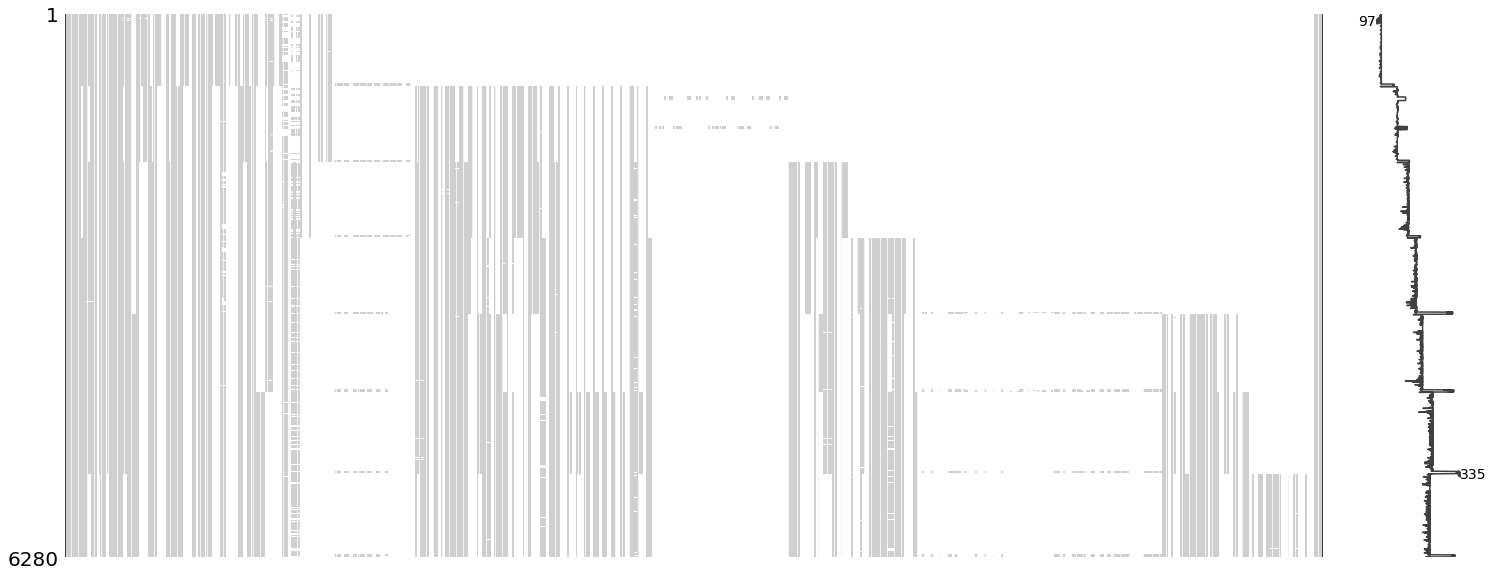

In [8]:
msno.matrix(full_df)

## Saving the Data
Saving data to csv`

In [9]:
# write to csv
full_df.to_csv("../../data/county_level/full_df.csv")

'''
We can read back in the dataframe from this pickle using the following command:
output = pd.read_csv("../data/county_level/full_df.csv")

'''


'\nWe can read back in the dataframe from this pickle using the following command:\noutput = pd.read_csv("../data/county_level/full_df.csv")\n\n'

In [10]:
df = pd.read_csv("../../data/county_level/full_df.csv")
df

,Unnamed: 0,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,...,Residential segregation - non-white/white raw value,Residential segregation - non-white/white numerator,Residential segregation - non-white/white denominator,Residential segregation - non-white/white CI low,Residential segregation - non-white/white CI high,Deaths,Population,Crude Rate,Average Temperature,Average Precipitation
0,0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,...,NaN,NaN,NaN,NaN,NaN,12,54571,22.0,63.000000,3.416667
1,1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,...,NaN,NaN,NaN,NaN,NaN,31,182265,17.0,65.666667,4.416667
2,2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,...,NaN,NaN,NaN,NaN,NaN,11,57322,19.2,60.416667,3.833333
3,3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,...,NaN,NaN,NaN,NaN,NaN,13,118572,11.0,60.500000,3.333333
4,4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,...,NaN,NaN,NaN,NaN,NaN,14,49948,28.0,63.916667,3.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,6275,56,1,56001,WY,Albany County,2016,1.0,5297.8,258.0,...,23.663518,NaN,NaN,NaN,NaN,10,38256,26.1,42.166667,0.583333
6276,6276,56,13,56013,WY,Fremont County,2016,1.0,13137.7,679.0,...,56.868864,NaN,NaN,NaN,NaN,19,40242,47.2,42.333333,1.000000
6277,6277,56,21,56021,WY,Laramie County,2016,1.0,7002.7,1029.0,...,26.574855,NaN,NaN,NaN,NaN,25,98136,25.5,47.250000,0.833333
6278,6278,56,25,56025,WY,Natrona County,2016,1.0,8170.3,957.0,...,36.878401,NaN,NaN,NaN,NaN,17,81039,21.0,45.166667,0.500000


In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 713 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Unnamed: 0                                                           int64  
 1    State FIPS Code                                                      int64  
 2    County FIPS Code                                                     int64  
 3    5-digit FIPS Code                                                    int64  
 4    State Abbreviation                                                   object 
 5    Name                                                                 object 
 6    Release Year                                                         int64  
 7    County Ranked (Yes=1/No=0)                                           float64
 8    Premature death raw value                               

In [12]:
df = df.infer_objects() # infer datatypes for each column if possible
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 713 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Unnamed: 0                                                           int64  
 1    State FIPS Code                                                      int64  
 2    County FIPS Code                                                     int64  
 3    5-digit FIPS Code                                                    int64  
 4    State Abbreviation                                                   object 
 5    Name                                                                 object 
 6    Release Year                                                         int64  
 7    County Ranked (Yes=1/No=0)                                           float64
 8    Premature death raw value                               

In [13]:
df = df.dropna(axis=1, how='all') # drop all columns that are entirely missing
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 512 columns):
 #    Column                                                               Dtype  
---   ------                                                               -----  
 0    Unnamed: 0                                                           int64  
 1    State FIPS Code                                                      int64  
 2    County FIPS Code                                                     int64  
 3    5-digit FIPS Code                                                    int64  
 4    State Abbreviation                                                   object 
 5    Name                                                                 object 
 6    Release Year                                                         int64  
 7    County Ranked (Yes=1/No=0)                                           float64
 8    Premature death raw value                               

<AxesSubplot:>

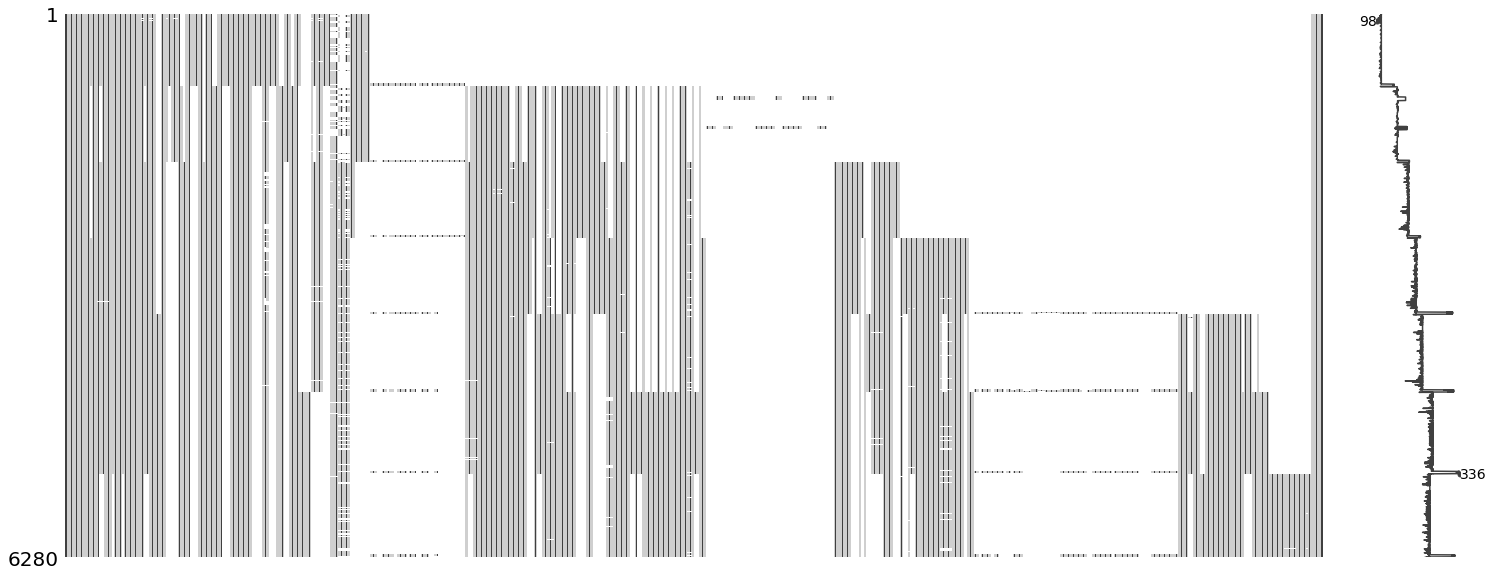

In [14]:
msno.matrix(df)

In [15]:
df.to_csv("../../data/county_level/full_df.csv") # save df again